# 剪断試験
## 


 70dC 
        0      1      2       3        4
0  0.000  30.10  96.60  140.90  196.600
1  5.160   4.89   5.78    5.56    4.970
2  0.318    NaN   0.10    0.12    0.257

 80dC 
        0       1        2        3
0  0.000  58.700  107.070  327.630
1  8.100   4.920    5.250    5.000
2  0.147   0.281    0.073    0.101

 90dC 
         0       1
0  113.82  166.63
1    4.98    5.16
2    0.08    0.01


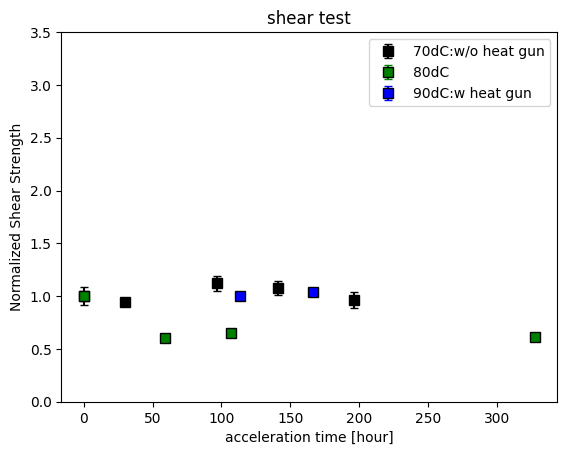

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

T_accel =['70dC_wo_heatgun','80dC','90dC_w_heatgun']
fig, ax = plt.subplots()
colors = ['black','green','blue','red']
ntemp = T_accel.__len__()
label_list = ['70dC:w/o heat gun' ,'80dC','90dC:w heat gun','98dC']

for itemp in range(ntemp):
	temp_accel = T_accel[itemp]
	filename = f'shear_{temp_accel}.csv'

	df = pd.read_csv(filename
				  	,sep="\t"
					 ,skiprows=1
					 ,header=None
					 )
	print("\n",temp_accel,"\n",df)
	#weight_dataset = df.to_numpy()
	#t_accel = weight_dataset[0]
	#weight_break = weight_dataset[1]
	#weight_err = weight_dataset[2]

	#ax.errorbar(t_accel, weight_break, yerr=weight_err, capsize=3, fmt='s'
	#			, ecolor=colors[itemp], color=colors[itemp],ms=7, mec='k'
	#			, label=label_list[itemp])

	# 規格化
	weight_dataset = df.to_numpy()
	t_accel = weight_dataset[0]
	initialBreakingWeight = weight_dataset[1][0]
	initialBreakingWeightErr = weight_dataset[2][0]
	breakingWeightRatio = weight_dataset[1]/initialBreakingWeight
	weightRatioErr = breakingWeightRatio*np.sqrt(np.square(weight_dataset[2]/weight_dataset[1])+np.square(initialBreakingWeightErr/initialBreakingWeight))
	ax.errorbar(t_accel, breakingWeightRatio, yerr=weightRatioErr, capsize=3, fmt='s'
				, ecolor=colors[itemp], color=colors[itemp],ms=7, mec='k'
				, label=label_list[itemp])



ax.set_xlabel('acceleration time [hour]')
#ax.set_ylabel('adhesive power [kg]')
ax.set_ylabel('Normalized Shear Strength')
plt.legend(loc='upper right')
ax.set_title('shear test')
plt.ylim([0,3.5])
plt.show()
